# ***Final Homework***

# Classification of images in 10 classes
- You have to use the images included in the training and validation sets to create a classification model that can distinguish between the 10 classes (objects) present in the data.
- Each class has nearly 1000 images in training, about 300 in validation.
- The neural network model must include at least 4 blocks, each consisting of 1 convolutional, 1 maxpooling,  1 dropout. These blocks must be followed by at least 1 flattening layer, 1 dense layer, 1 output layer.
- You must then upload the notebook with all visible outputs

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
!unzip /content/drive/MyDrive/train.zip
!unzip /content/drive/MyDrive/val.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/n03445777/n03445777_6606.JPEG  
  inflating: train/n03445777/n03445777_663.JPEG  
  inflating: train/n03445777/n03445777_6637.JPEG  
  inflating: train/n03445777/n03445777_6644.JPEG  
  inflating: train/n03445777/n03445777_6656.JPEG  
  inflating: train/n03445777/n03445777_6658.JPEG  
  inflating: train/n03445777/n03445777_6759.JPEG  
  inflating: train/n03445777/n03445777_6785.JPEG  
  inflating: train/n03445777/n03445777_6789.JPEG  
  inflating: train/n03445777/n03445777_679.JPEG  
  inflating: train/n03445777/n03445777_6794.JPEG  
  inflating: train/n03445777/n03445777_6807.JPEG  
  inflating: train/n03445777/n03445777_6809.JPEG  
  inflating: train/n03445777/n03445777_6848.JPEG  
  inflating: train/n03445777/n03445777_6854.JPEG  
  inflating: train/n03445777/n03445777_6856.JPEG  
  inflating: train/n03445777/n03445777_6859.JPEG  
  inflating: train/n03445777/n03445777_6908.JPEG  
  inflating: train/n03445777/n034

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


MM = ImageDataGenerator(horizontal_flip=True,rotation_range=20,rescale=1./255)
VV = ImageDataGenerator(rescale=1./255)
   
train_gen = MM.flow_from_directory('train', target_size=(160, 160), color_mode='rgb', \
                                 class_mode='categorical', batch_size=32, shuffle=True)
val_gen = VV.flow_from_directory('val', target_size=(160, 160), color_mode='rgb', \
                                  class_mode='categorical', batch_size=32)

print("Training an validation images have been uploaded")

Found 9349 images belonging to 10 classes.
Found 3805 images belonging to 10 classes.
Training an validation images have been uploaded


In [7]:
names = ['Fish','Dog','Media Player','Power Saw', 'Church', 'French Horn',
         'Garbage Truck', 'Gas Station Equipment', 'Golf Ball', 'Paragliding']

In [8]:
im1 = val_gen[2]
print(im1[0].shape)
print(im1[1].shape)

(32, 160, 160, 3)
(32, 10)


Selected picture : Dog


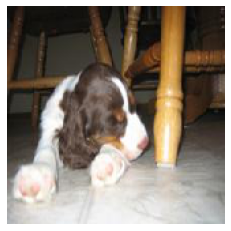

In [9]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

print("Selected picture :",names[np.argmax(im1[1])])
plt.imshow((im1[0][0,:,:,:]),alpha=1,)
plt.axis('off')
plt.show()

## Construct the model starting from the inception-v3

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPool2D, Dropout, Flatten

In [11]:
inp = Input((160,160,3))

x = Conv2D(64,(3,3),activation='relu',padding='same')(inp)
x = MaxPool2D((2,2))(x)
x = Dropout(0.2)(x)

x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = MaxPool2D((2,2))(x)
x = Dropout(0.3)(x)

x = Conv2D(256,(3,3),activation='relu',padding='same')(x)
x = MaxPool2D((2,2))(x)
x = Dropout(0.3)(x)

x = Conv2D(512,(3,3),activation='relu',padding='same')(x)
x = MaxPool2D((2,2))(x)
x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

out = Dense(10, activation='softmax')(x)

model = Model(inp, out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 160, 160, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 80, 80, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 40, 40, 128)      0         
 2D)                                                         

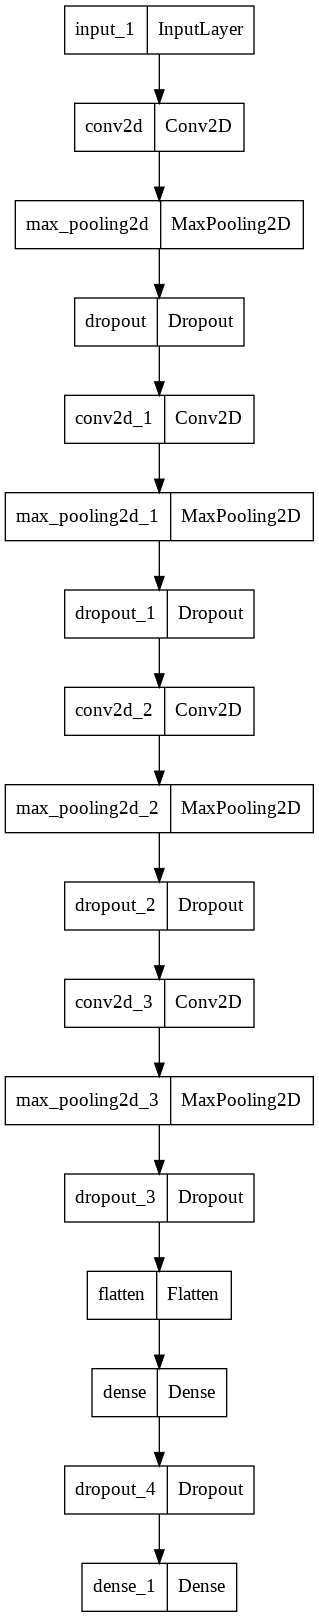

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [13]:
import tensorflow as tf

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['acc'])

model.fit(train_gen, epochs=50, validation_data=val_gen )

Epoch 1/50
293/293 [==============================] - 81s 235ms/step - loss: 2.0520 - acc: 0.2716 - val_loss: 1.8571 - val_acc: 0.4142
Epoch 2/50
293/293 [==============================] - 68s 233ms/step - loss: 1.6651 - acc: 0.4344 - val_loss: 1.6448 - val_acc: 0.4894
Epoch 3/50
293/293 [==============================] - 67s 230ms/step - loss: 1.4676 - acc: 0.5128 - val_loss: 1.4227 - val_acc: 0.5685
Epoch 4/50
293/293 [==============================] - 68s 231ms/step - loss: 1.2925 - acc: 0.5727 - val_loss: 1.3090 - val_acc: 0.5916
Epoch 5/50
293/293 [==============================] - 68s 231ms/step - loss: 1.1680 - acc: 0.6204 - val_loss: 1.1649 - val_acc: 0.6289
Epoch 6/50
293/293 [==============================] - 67s 230ms/step - loss: 1.0826 - acc: 0.6495 - val_loss: 1.1476 - val_acc: 0.6305
Epoch 7/50
293/293 [==============================] - 67s 230ms/step - loss: 1.0118 - acc: 0.6683 - val_loss: 1.1293 - val_acc: 0.6426
Epoch 8/50
293/293 [==============================] - 6

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

score = model.evaluate(val_gen)

print("Loss of Model: ",score[0])
print("Accuracy of Model: ", score[1]*100, "%")

119/119 [==============================] - 5s 43ms/step - loss: 1.4074 - acc: 0.7338
Loss of Model:  1.407412052154541
Accuracy of Model:  73.37713241577148 %


In [16]:
val_gen2 = VV.flow_from_directory('val', target_size=(160, 160), color_mode='rgb', \
                                  class_mode='categorical', batch_size=1)
y = np.zeros((3805,10))
for j in range(3805):
  y[j,:] = val_gen2[j][1]
ypred = model.predict(val_gen2)

Found 3805 images belonging to 10 classes.


In [17]:
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

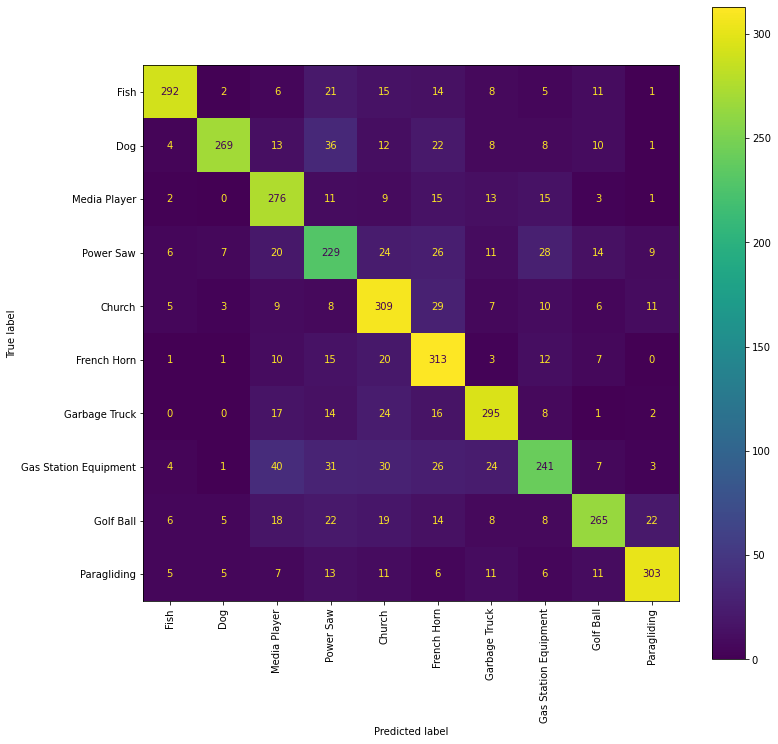

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
ystim = np.argmax(ypred,axis=1)
ytrue = np.argmax(y,axis=1)
conf = confusion_matrix(ytrue,ystim)

disp = ConfusionMatrixDisplay(confusion_matrix=conf,
                              display_labels=names)


fig, ax = plt.subplots(figsize=(12, 12))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='viridis')

plt.show()

My algorithm predicts:

Prediction of being a picture of Fish :  1.9002545847621177e-11 %
Prediction of being a picture of Dog :  3.8463446295176895e-11 %
Prediction of being a picture of Media Player :  5.603699101963677e-09 %
Prediction of being a picture of Power Saw :  5.2767760592899865e-12 %
Prediction of being a picture of Church :  8.279512186959437e-07 %
Prediction of being a picture of French Horn :  4.3628164130709874e-13 %
Prediction of being a picture of Garbage Truck :  6.859557952036688e-11 %
Prediction of being a picture of Gas Station Equipment :  2.1524482771238113e-12 %
Prediction of being a picture of Golf Ball :  9.53803355741023e-09 %
Prediction of being a picture of Paragliding :  100.0 %


Selected picture: Paragliding


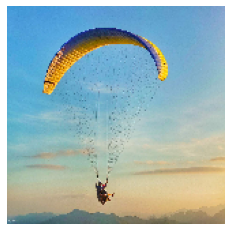

In [21]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img_path = "test.jpg"   # change this to the name of your image file 
# We preprocess the image to fit your algorithm.

img = image.load_img(img_path, target_size=(160, 160))
A = image.img_to_array(img)/255.
B = A.reshape(1,160,160,3)
my_prediction = model.predict(B)
np.set_printoptions(suppress=True,precision=4)

print("My algorithm predicts:\n")

for i in range(10):
  print("Prediction of being a picture of", names[i], ": ", my_prediction[0][i]*100, "%")
print("\n")
print("Selected picture:",names[np.argmax(my_prediction)])

plt.imshow(A)
plt.axis('off')
plt.show()

